# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Sindy Johana Martínez Marín**   
*Diplomado en Analítica de Mercados Energéticos*

Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [66]:
import pandas as pd
import numpy as np

R = []

for n in range (1995,2018):
    if n<2000:
        skip = 3
    else:
        skip=2
        
    NombreArchivo = 'Precio_Bolsa_Nacional_($kwh)_' + str(n) 
    if n>= 2016:
        NombreArchivo += '.xls'
    else:
        NombreArchivo += '.xlsx'
        
    v = pd.read_excel(NombreArchivo, skiprows=skip, parse_cols=24) 
    R.append(v)
    D= pd.concat(R)
    
print(D.head())

        Fecha      0      1      2      3      4      5      6      7      8  \
0  1995-07-20    NaN  1.073  1.073  1.073  1.073  1.073  1.073  1.073  1.074   
1  1995-07-21  1.073  1.000  1.000  1.000  1.000  1.000  5.000  6.000  6.000   
2  1995-07-22  1.073  1.073  1.000  1.000  1.000  1.073  1.303  1.303  1.303   
3  1995-07-23  1.073  1.000  1.000  1.000  1.000  1.000  0.100  1.000  1.000   
4  1995-07-24  1.000  1.000  0.990  1.000  1.000  1.073  3.000  3.000  3.000   

   ...       14     15     16     17      18      19      20     21     22  \
0  ...    1.073  1.073  1.073  1.073   1.074   1.897   1.897  1.897  1.073   
1  ...    5.000  1.000  1.000  5.000  12.000  16.670  11.929  5.000  1.000   
2  ...    1.073  1.000  1.000  1.000   1.303   2.500   2.500  1.303  1.073   
3  ...    1.000  0.100  0.100  1.000   1.238   1.238   1.238  1.238  1.073   
4  ...    1.073  1.073  3.000  2.000  18.630  22.500   9.256  3.000  1.073   

      23  
0  1.073  
1  1.000  
2  1.073  
3  1.0

**2.--** Compute e imprima el número de registros con datos faltantes.

In [67]:
NAN= D.isnull().values.ravel().sum()
print(NAN)

247


**3.--** Compute e imprima el número de registros duplicados.

In [68]:
DUP=D[D.duplicated()]
print(len(DUP))

67


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [69]:
ND=D.drop_duplicates()
DF= ND.dropna()
print(DF.head())

        Fecha      0      1      2     3     4      5      6      7      8  \
1  1995-07-21  1.073  1.000  1.000  1.00  1.00  1.000  5.000  6.000  6.000   
2  1995-07-22  1.073  1.073  1.000  1.00  1.00  1.073  1.303  1.303  1.303   
3  1995-07-23  1.073  1.000  1.000  1.00  1.00  1.000  0.100  1.000  1.000   
4  1995-07-24  1.000  1.000  0.990  1.00  1.00  1.073  3.000  3.000  3.000   
5  1995-07-25  0.990  0.990  0.989  0.99  0.99  1.073  1.263  1.263  1.263   

   ...       14     15     16     17      18      19      20     21     22  \
1  ...    5.000  1.000  1.000  5.000  12.000  16.670  11.929  5.000  1.000   
2  ...    1.073  1.000  1.000  1.000   1.303   2.500   2.500  1.303  1.073   
3  ...    1.000  0.100  0.100  1.000   1.238   1.238   1.238  1.238  1.073   
4  ...    1.073  1.073  3.000  2.000  18.630  22.500   9.256  3.000  1.073   
5  ...    1.073  1.073  1.073  1.073   1.263   1.500   1.263  1.263  1.073   

      23  
1  1.000  
2  1.073  
3  1.000  
4  1.000  
5  0.99

**5.--** Compute y grafique el precio primedio diario.

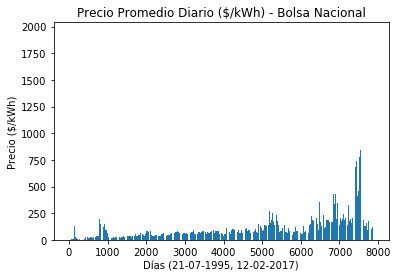

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

PromDia = DF.mean(axis=1)
plt.bar(range(len(PromDia)), PromDia)
plt.title("Precio Promedio Diario ($/kWh) - Bolsa Nacional")   
plt.xlabel("Días (21-07-1995, 12-02-2017)")    
plt.ylabel("Precio ($/kWh)") 
plt.show()
#print(PromDia.head())

**6.--** Compute y grafique el precio máximo por mes.

C:\Users\Sindy\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


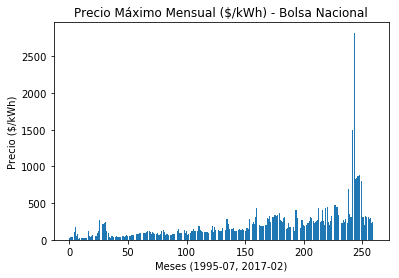

In [71]:
w = []
for n in range(len(DF['Fecha'])):
    w.append(str(DF.iloc[n,0])[0:7])
DF['key'] = w
#DF.head()

MaxMes = DF.groupby('key').max()
MaxMes = MaxMes.max(axis=1)
#print(MaxMes.head())

plt.bar(range(len(MaxMes)), MaxMes)
plt.title("Precio Máximo Mensual ($/kWh) - Bolsa Nacional")  
plt.xlabel("Meses (1995-07, 2017-02)")   
plt.ylabel("Precio ($/kWh)") 
plt.show()


**7.--** Compute y grafique el precio mínimo mensual.


key
1995-07    0.000
1995-08    0.000
1995-09    1.073
1995-10    0.000
1995-11    1.072
dtype: float64


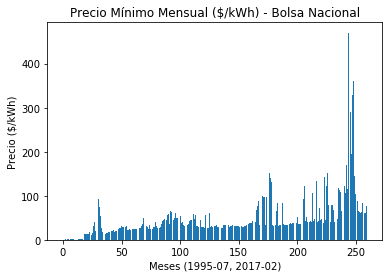

In [72]:
MinMes = DF.groupby('key').min()
MinMes = MinMes.min(axis=1)
print(MinMes.head())

plt.bar(range(len(MinMes)), MinMes)
plt.title("Precio Mínimo Mensual ($/kWh) - Bolsa Nacional")   
plt.xlabel("Meses (1995-07, 2017-02)")  
plt.ylabel("Precio ($/kWh)") 
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

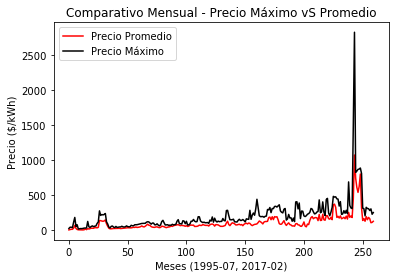

In [89]:
PromMes = DF.groupby('key').mean()
PromMes = PromMes.mean(axis=1)
#PromMes.head()

plt.plot(range(len(PromMes)), PromMes, color='r', label = "Precio Promedio")
plt.ion()
plt.plot(range(len(MaxMes)), MaxMes, color='k', label= "Precio Máximo")
plt.title("Comparativo Mensual - Precio Máximo vS Promedio")   
plt.xlabel("Meses (1995-07, 2017-02)")  
plt.ylabel("Precio ($/kWh)")
plt.legend(loc="upper left") 
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

C:\Users\Sindy\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Sindy\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


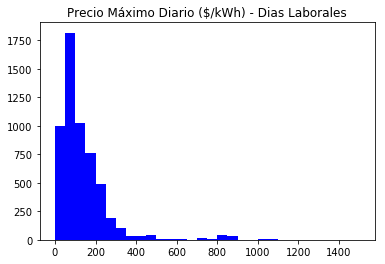

In [84]:
DS= [1, 2, 3, 1, 1, 1, 1]*int(len(DF)/7) #1 dias laborales, 2 sábados, 3 domingos
DF['Dia Semana']=DS
MaxDia=DF.max(axis=1)
DF['PrecMaxDia']=MaxDia
Dlab= DF[DF['Dia Semana']==1]
#print(Dlab.head()) 

plt.hist(Dlab['PrecMaxDia'], bins=30, range=(0,1500), stacked=True, color = ['b'])
plt.title("Precio Máximo Diario ($/kWh) - Dias Laborales")   
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

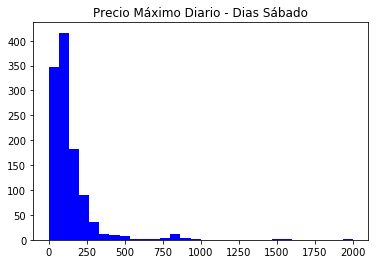

In [82]:
DS= [1, 2, 3, 1, 1, 1, 1]*int(len(DF)/7) #1 dias laborales, 2 sábados, 3 domingos
DS= DF['Dia Semana']
MaxDia= DF['PrecMaxDia']
MaxDia= DF.max(axis= 1)
DSab= DF[DF['Dia Semana']==2]
#print(DSab.head()) 

plt.hist(DSab['PrecMaxDia'], bins=30, range=(0,2000), stacked=True, color = ['b'])
plt.title("Precio Máximo Diario - Dias Sábado")   
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

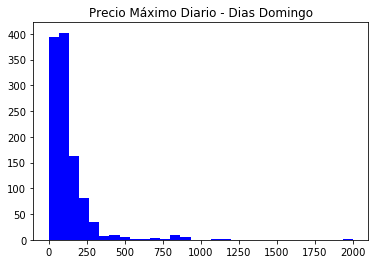

In [83]:
DS= [1, 2, 3, 1, 1, 1, 1]*int(len(DF)/7) #1 dias laborales, 2 sábados, 3 domingos
DS= DF['Dia Semana']
MaxDia= DF['PrecMaxDia']
MaxDia= DF.max(axis= 1)
DDom= DF[DF['Dia Semana']==3]
#print(DDom.head()) 

plt.hist(DDom['PrecMaxDia'], bins=30, range=(0,2000), stacked=True, color = ['b'])
plt.title("Precio Máximo Diario - Dias Domingo")   
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [85]:
from IPython.display import display

Yr= []
for n in range(len(DF['Fecha'])):
    Yr.append(str(DF.iloc[n,0])[0:4])
DF['Año']= Yr
DF.head()

MinYr= DF.groupby('Año').min()
MinYr = MinYr.min(axis=1)
display(MinYr)

C:\Users\Sindy\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Año
1995    0.0
1996    0.0
1997    1.0
1998    1.0
1999    1.0
2000    1.0
2001    1.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

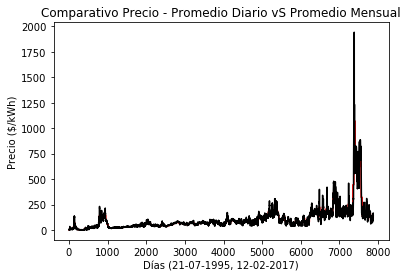

In [91]:
ind= ['{}'.format(n) for n in range(len(DF))]
DF.index = ind

y=DF.groupby('key')
z=DF.loc[y.groups[DF['key'] [43]]].mean()
z.mean()

PMes= []

for n in range(len(DF)):
    y=DF.groupby('key')
    z=DF.loc[y.groups[DF['key'] [n]]].mean()
    z=z.mean()
    PMes.append(z)

plt.plot(pd.Series(PMes).values, color='r')
plt.plot(pd.Series(PromDia).values, color='k')
plt.title("Comparativo Precio - Promedio Diario vS Promedio Mensual")
plt.xlabel("Días (21-07-1995, 12-02-2017)") 
plt.ylabel("Precio ($/kWh)")

A continuación, se presenta de forma más detallada la figura anterior, comparativa de Precio Promedio Diario y Precio Promedio Mensual

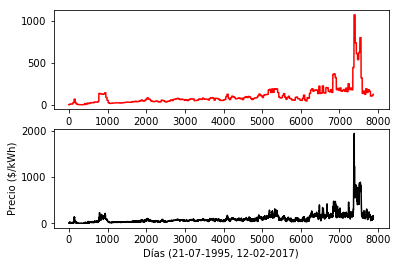

In [100]:
plt.subplot(2,1,1)
plt.plot(pd.Series(PMes).values, color='r')   
plt.subplot(2,1,2)
plt.plot(pd.Series(PromDia).values, color='k')
#plt.title("Comparativo Precio - Promedio Diario vS Promedio Mensual")
plt.xlabel("Días (21-07-1995, 12-02-2017)") 
plt.ylabel("Precio ($/kWh)")
plt.show()